## **Car Price Prediction**  ##




   ![](https://www.animatedimages.org/data/media/67/animated-car-image-0127.gif)


**Introduction**

Car pricing is a complex matter, impacted by various elements like brand reputation, vehicle specifications, power output, fuel efficiency, and many more. Machine learning has a prominent role in forecasting car prices, making it a fascinating area to explore. This project aims to provide a step-by-step walkthrough of building a car price prediction model, serving as a valuable foundation for those eager to delve into this intriguing field.

**Objective**

Our goal in this project is to create a machine learning-based car price prediction model. We'll be working with a dataset that contains comprehensive details about various cars, encompassing their attributes and pricing. Throughout this endeavor, we'll delve into the intricacies of data preprocessing, model training, and evaluating its predictive capabilities using this dataset.

**Steps Covered:**

1. Data Ingestion and Exploration: We'll start by loading the required libraries and getting acquainted with the dataset, ensuring we have a                                   good understanding of its contents.

2. Data Preprocessing: This phase involves preparing the data for modeling, including handling categorical variables through encoding                                techniques.

3. Dataset Split: We'll divide the dataset into training and testing sets, a critical step in model development.

4. Model Selection and Training: We will choose the appropriate model for our car price prediction task and train it using the training                                        dataset.

5. Model Evaluation: After training, we'll assess the model's performance to gauge its accuracy and reliability.

6. Price Prediction: Using the trained model, we'll make car price predictions based on a new set of features.

**Let's begin by loading the necessary libraries and exploring the dataset**

## **Import Libraries**  ##


In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## **Load and Explore Dataset**  ##


In [34]:
# Load the dataset
df = pd.read_csv("/kaggle/input/car-price/CarPrice_Assignment.csv")

# Display first few rows
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [35]:
# Display dataset shape
df.shape

(205, 26)

In [36]:
# Display dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [37]:
# Check for missing values
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

## **Exploratory data analysis**  ##

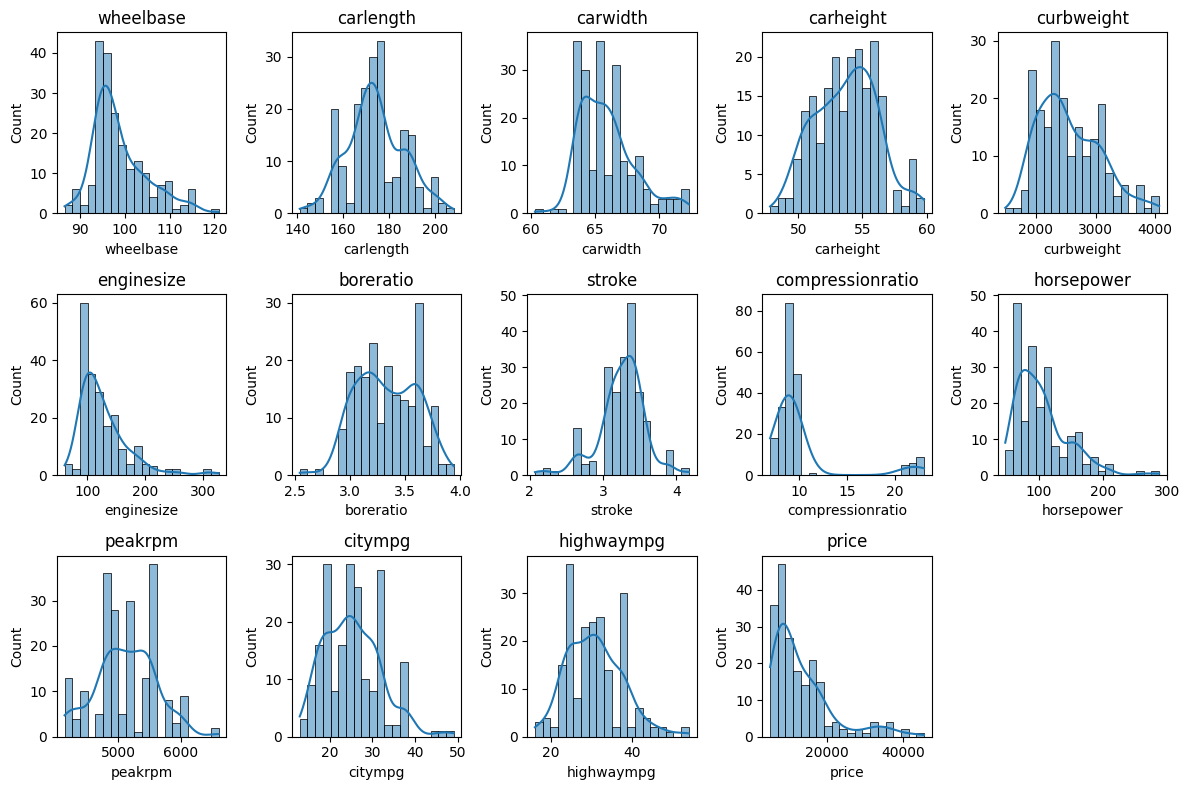

In [38]:
# Distribution of Numerical Features
numerical_features = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
                      'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
                      'peakrpm', 'citympg', 'highwaympg', 'price']

plt.figure(figsize=(12, 8))
for feature in numerical_features:
    plt.subplot(3, 5, numerical_features.index(feature) + 1)
    sns.histplot(data=df[feature], bins=20, kde=True)
    plt.title(feature)
plt.tight_layout()
plt.show()

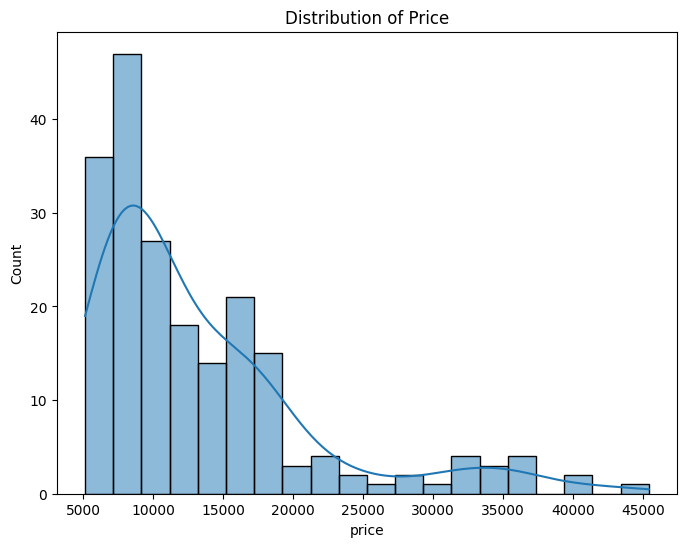

In [39]:
# Price Analysis
plt.figure(figsize=(8, 6))
sns.histplot(data=df['price'], bins=20, kde=True)
plt.title('Distribution of Price')
plt.show()

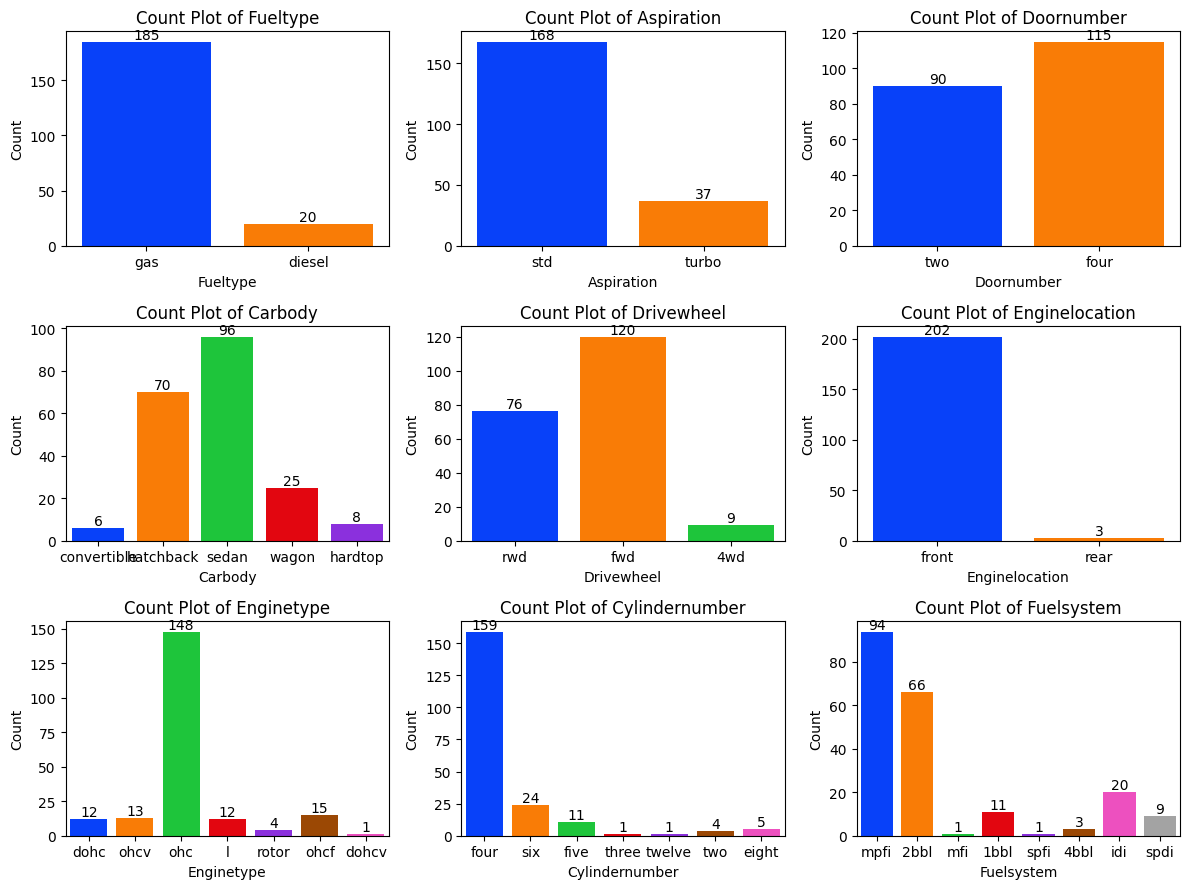

In [40]:
# Define the list of categorical columns to analyze
categorical_columns = ['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
                       'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 9))
axes = axes.ravel()  # Flatten the 2D array of axes

# Loop through each categorical column
for i, column in enumerate(categorical_columns):
    sns.countplot(x=df[column], data=df, palette='bright', ax=axes[i], saturation=0.95)
    for container in axes[i].containers:
        axes[i].bar_label(container, color='black', size=10)
    axes[i].set_title(f'Count Plot of {column.capitalize()}')
    axes[i].set_xlabel(column.capitalize())
    axes[i].set_ylabel('Count')

# Adjust layout and show plots
plt.tight_layout()
plt.show()

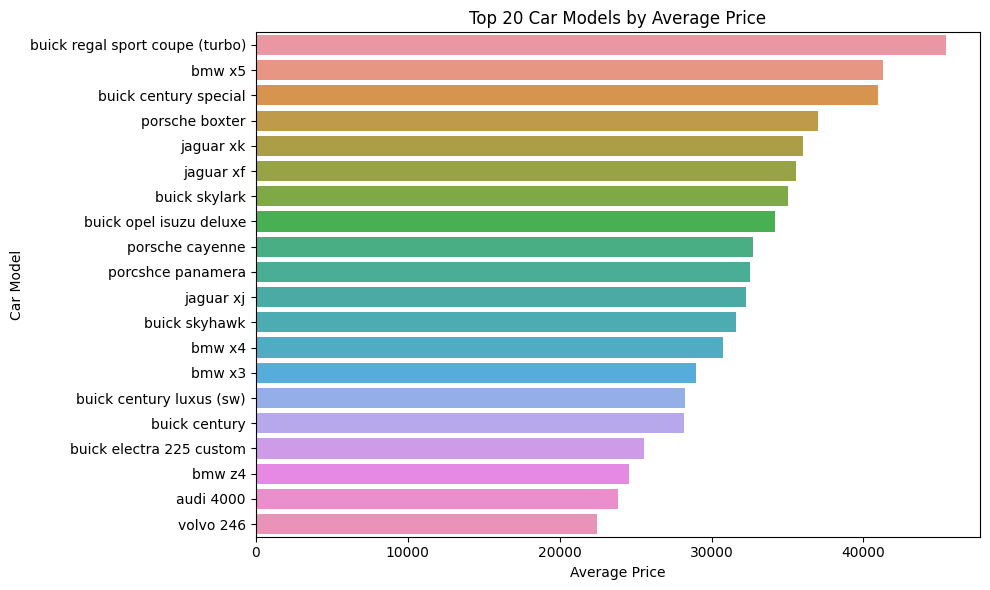

In [41]:
# Calculate average price for each car model
avg_prices_by_car = df.groupby('CarName')['price'].mean().sort_values(ascending=False)

# Plot top N car models by average price
n = 20  # Number of top car models to plot
top_car_models = avg_prices_by_car.head(n)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_car_models.values, y=top_car_models.index)
plt.title(f'Top {n} Car Models by Average Price')
plt.xlabel('Average Price')
plt.ylabel('Car Model')
plt.tight_layout()
plt.show()

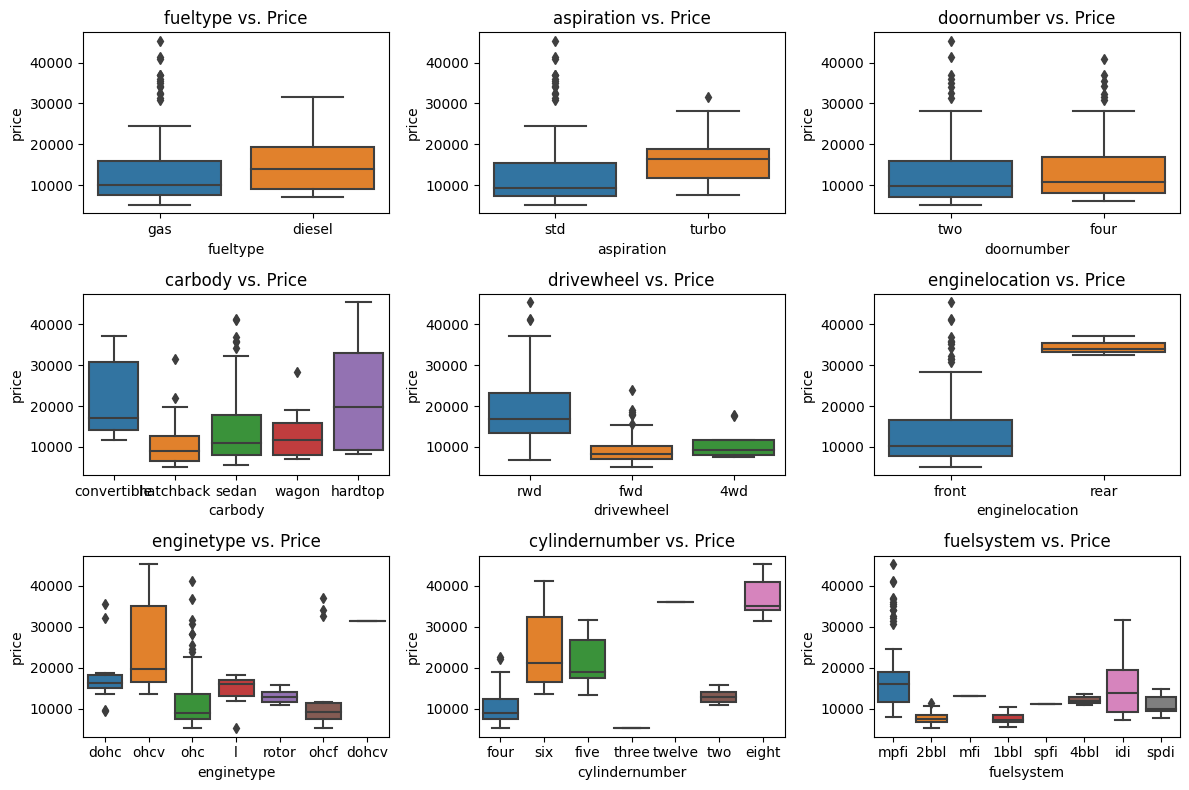

In [42]:
# Categorical Feature vs. Price
plt.figure(figsize=(12, 8))
for feature in categorical_columns:
    plt.subplot(3, 3, categorical_columns.index(feature) + 1)
    sns.boxplot(data=df, x=feature, y='price')
    plt.title(f'{feature} vs. Price')
plt.tight_layout()
plt.show()

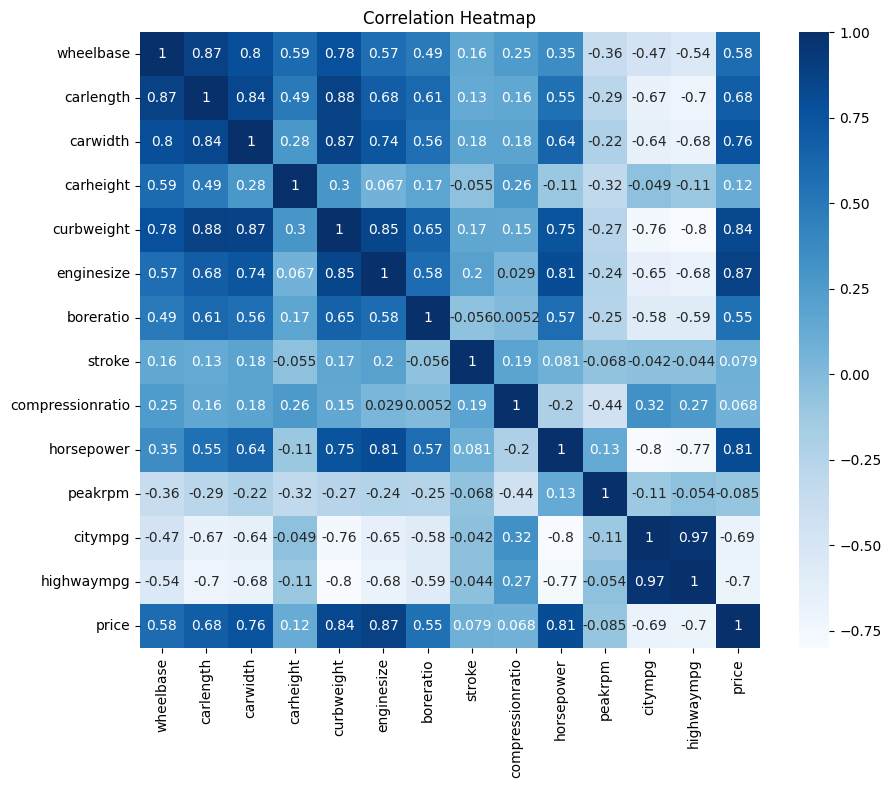

In [43]:
# Correlation Analysis
correlation_matrix = df[numerical_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()

## **Data Preprocessing**  ##

In [44]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
var_mod = df.select_dtypes(include='object').columns

for i in var_mod:
    df[i] = le.fit_transform(df[i])


## **Split Data and Train-Test Split**  ##

In [45]:
from sklearn.model_selection import train_test_split

X = df.drop(['price'], axis=1)
y = df['price']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

## **Model Selection and Training**  ##

In [46]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

## **Model Evaluation**  ##

In [47]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 8230141.39204831
R-squared: 0.8757611204387454


## **Final Result : Price Prediction for New Car Features**  ##

In [48]:
new_car_features = [4000, 0, 2, 3, 0, 96.0, 172.0, 65.4, 2221, 120, 4, 3.46, 3.19, 9.0, 68, 5500, 31, 38, 0, 0, 0, 0, 0, 0, 0]
new_car_price = model.predict([new_car_features])
print("Predicted Price:", new_car_price[0])


Predicted Price: 34105882.330555454


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
